In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

## File Input for MMR data
#direc = r'/Users/michellehu/Downloads/PSG_cloud_project_copy/NEWDATA/referCase-mix/'
#tpdirec = r'/Users/michellehu/Downloads/PSG_cloud_project_copy/NEWDATA/referCase-mix/'

CASE_NAME = 'RH-99'
direc = r'/home/michellehuyy/CARMA_DATA/' + f"{CASE_NAME}" + r'/'
tpdirec = r'/home/michellehuyy/CARMA_DATA/' + f"{CASE_NAME}" + r'/'
# cases = ['referCase_liq', \cd
#          'flux063-liq', 'flux078-liq', 'flux110-liq', \
#          'kzz-1e4-liq', 'kzz-1e6-liq', 'kzz-1e7-liq', \
#          'g07-liq', 'g14-liq', 'g20-liq', \
#          'pres-025-liq', 'pres-05-liq', 'pres-20-liq', 'pres-40-liq', \
#          'nCCN-01-liq', 'nCCN-10-liq', 'nCCN-100-liq', \
#          '1e-5r0-liq', '5e-5r0-liq', '2e-4r0-liq', '1e-3r0-liq', \
#          'co2-liq', 'h2-liq']

# cases = ['referCase_mix_RH080_initRH080','referCase_mix_RH080_initRH080_kzz','referCase_mix_RH080_initRH080_kzz2km']
# cases = ['referCase_mix_RH080_initRH080_kzz2km','referCase_mix_RH080_initRH080_kzz1e7_2km','referCase_mix_RH080_initRH080_kzz1e8_2km']
# cases = ['referCase_mix_RH095_initRH095_kzz1e6_2km','referCase_mix_RH095_initRH095_kzz1e7_2km','referCase_mix_RH095_initRH095_kzz1e8_2km']
# cases = ['referCase_mix_RH095_initRH095_kzz1e8_2km','referCase_mix_RH095_initRH095_kzz1e8_2km_1min',
#          'referCase_mix_RH095_initRH095_kzz1e8_2km_2min','referCase_mix_RH095_initRH095_kzz1e8_2km_5min']
# cases = ["referCase_mix_RH095_initRH095_kzz1e8_2km_1min_threse4","referCase_mix_RH095_initRH095_kzz1e8_2km_2min_threse4","referCase_mix_RH095_initRH095_kzz1e8_2km_5min_threse4"]
# cases = ["referCase-mix"]#,"referCase_mix_RH095_initRH095_kzz4e6_2km_1min_threse4_activ-1"]
# cases = ['nCCN-1']
cases = ['nCCN-1000']
tpcases =  ['referCase_mix_RH095_initRH095_kzz4e6_2km_100m100_surfaceCCN', \
         'flux063-liq-tp', 'flux078-liq-tp', 'flux110-liq-tp', \
         'g07-liq-tp', 'g14-liq-tp', 'g20-liq-tp', \
         'pres-025-liq-tp', 'pres-05-liq-tp', 'pres-20-liq-tp', 'pres-40-liq-tp']

# itp = [0,1,2,3,0,0,0,4,5,6,7,8,9,10,0,0,0,0,0,0,0,0,0]
itp = [0,0,0,0]
NFILE = len(cases)
#restart = [1]*NFILE
dt = [300]#,120,300]
nt = [560]#,170,170]
NT = max(nt)
# NT = 

NBIN = 50
NZ = 100
NELEM = 6

[NGROUP, NELEM, NBIN, NGAS, NZ] = [4,6,50,1,100]
itime = np.zeros((NFILE,NT),float)

mmr_all = np.zeros((NFILE,NT,NELEM,NZ,NBIN),float)
vr_all = np.zeros((NFILE,NT,NELEM,NZ,NBIN),float)
conc_all = np.zeros((NFILE,NT,NELEM,NZ,NBIN),float)
ppmv_all = np.zeros((NFILE,NT,NELEM,NZ,NBIN),float)
ppm_all = np.zeros((NFILE,NT,NELEM,NZ,NBIN),float)
mmr_gas_all = np.zeros((NFILE,NT,NGAS,NZ),float)
satice_all = np.zeros((NFILE,NT,NGAS,NZ),float)
satliq_all = np.zeros((NFILE,NT,NGAS,NZ),float)

## Particle data
r = np.zeros((NFILE,NGROUP,NBIN),float)
rmass = np.zeros((NFILE,NGROUP,NBIN),float)

## Initial data
mmr_ini = np.zeros((NFILE,NELEM,NZ,NBIN),float)
ppm_ini = np.zeros((NFILE,NELEM,NZ,NBIN),float)
vr_ini = np.zeros((NFILE,NELEM,NZ,NBIN),float)
conc_ini = np.zeros((NFILE,NELEM,NZ,NBIN),float)
ppmv_ini = np.zeros((NFILE,NELEM,NZ,NBIN),float)
mmr_gas_ini = np.zeros((NFILE,NGAS,NZ),float)
satice_ini = np.zeros((NFILE,NGAS,NZ),float)
satliq_ini = np.zeros((NFILE,NGAS,NZ),float)

z = np.zeros((NFILE,NZ),float)
zkm = np.zeros((NFILE,NZ),float)
p = np.zeros((NFILE,NZ),float)
temp = np.zeros((NFILE,NZ),float)

groups = [0,1,2,2,3,3]
rho = [2,2,0.9,0.9,1,1]
[NGROUP, NELEM, NBIN, NGAS, NZ] = [4,6,50,1,100]




In [13]:
for ifile in range(NFILE):
    print(ifile)
    f1 = open(direc + r'carma_nuc_grow.txt', 'r')
#     ftp = open(direc + cases[0] + r'/run/carma-init/carma_nuc_grow.txt', 'r')
    ftp = f1
    if (itp[ifile] ==0):
#         ftp = f1
        ## Read Case Info: NGROUP, NELEM, NBIN, NGAS
        infoLine = ftp.readline()

        ## Read and draw background info
        for iz in range(0,NZ):
            zInfo = ftp.readline()
            zInfo = zInfo.strip().split()
            z[ifile,iz] = zInfo[1]
            zkm[ifile,iz] = z[ifile,iz]/1000.
            p[ifile,iz] = zInfo[2]
            temp[ifile,iz] = zInfo[3]

        ## Read Bin Info
        for igroup in range(0,NGROUP):
            for ibin in range(0,NBIN):
                rInfo = ftp.readline()
                rInfo = rInfo.strip().split()
                r[ifile,igroup,ibin] = float(rInfo[2])  # Unit: um; if / 1e4, convert to cm
                rmass[ifile,igroup,ibin] = float(rInfo[3])

        ## Read Initial Conditions
        itime_ini = float(ftp.readline().strip())
        for iz in range(0, NZ):
            for ielem in range(0, NELEM):
                for ibin in range(0, NBIN):
                    mmrInfo = ftp.readline()
                    mmrInfo = mmrInfo.strip().split()
                    mmr_ini[ifile,ielem,iz,ibin] = float(mmrInfo[3])
                    vr_ini[ifile,ielem,iz,ibin] = mmr_ini[ifile,ielem,iz,ibin] * p[ifile,iz] /temp[ifile,iz] /297000./rho[ielem]
                    conc_ini[ifile,ielem,iz,ibin] = vr_ini[ifile,ielem,iz,ibin] / (4/3 * np.pi *(r[ifile,groups[ielem],ibin]/1e4)**3)
                    ppm_ini[ifile,ielem,iz,ibin] = mmr_ini[ifile,ielem,iz,ibin] * 1e6
                    ppmv_ini[ifile,ielem,iz,ibin] = vr_ini[ifile,ielem,iz,ibin] * 1e6

        for iz in range (0, NZ):
            for igas in range(0, NGAS):
                mmrgasInfo = ftp.readline()
                mmrgasInfo = mmrgasInfo.strip().split()
                mmr_gas_ini[ifile,igas,iz] = float(mmrgasInfo[2])
                satliq_ini[ifile,igas,iz] = 1.
                satice_ini[ifile,igas,iz] = 1.
    else:
#         ftp = open(direc + cases[0] + r'carma_nuc_grow.txt', 'r')
        for iz in range(0,NZ):
            zInfo = ftp.readline()
            zInfo = zInfo.strip().split()
            z[ifile,iz] = zInfo[1]
            zkm[ifile,iz] = z[ifile,iz]/1000.
            p[ifile,iz] = zInfo[2]
            temp[ifile,iz] = zInfo[3]

        r[ifile,:,:] = r[0,:,:]
        rmass[ifile,:,:] = rmass[0,:,:]

    ## Read
    for iit in range(nt[ifile]):
    # Read Time Steps
        timeInfo = f1.readline()
        timeInfo = timeInfo.strip()
        itime[ifile,iit] = float(timeInfo)

        for iz in range(0, NZ):
            for ielem in range(0, NELEM):
                for ibin in range(0, NBIN):
                    mmrInfo = f1.readline()
                    mmrInfo = mmrInfo.strip().split()
                    mmr_all[ifile,iit,ielem,iz,ibin] = float(mmrInfo[3])
                    vr_all[ifile,iit,ielem,iz,ibin] = mmr_all[ifile,iit,ielem,iz,ibin] * p[ifile,iz] /temp[ifile,iz] /297000./rho[ielem]
                    conc_all[ifile,iit,ielem,iz,ibin] = vr_all[ifile,iit,ielem,iz,ibin] / (4/3 * np.pi *(r[ifile,groups[ielem],ibin]/1e4)**3)
                    ppm_all[ifile,iit,ielem,iz,ibin] = mmr_all[ifile,iit,ielem,iz,ibin] * 1e6
                    ppmv_all[ifile,iit,ielem,iz,ibin] = vr_all[ifile,iit,ielem,iz,ibin] * 1e6

        for iz in range(0, NZ):
            for igas in range(0, NGAS):
                mmrgasInfo = f1.readline()
                mmrgasInfo = mmrgasInfo.strip().split()
                mmr_gas_all[ifile,iit,igas,iz] = float(mmrgasInfo[2])
                satliq_all[ifile,iit,igas,iz] = float(mmrgasInfo[3])
                satice_all[ifile,iit,igas,iz] = float(mmrgasInfo[4])

    print("This is a 1-D simulation with:")
    print(str(NGROUP)+" groups, "+ \
      str(NELEM)+" elements, "+ \
      str(NBIN)+" bins, "+ \
      str(NGAS)+" gases, and "+ \
      str(NZ)+" levels.")
    print("The maximum volume mix ratio is: " + str(np.max(ppmv_all[ifile,:,:,:,:]))+" ppmv.")

    f1.close()
    ftp.close()


### CALCULATE WATER PATH
ICWP = np.zeros(([NFILE,NT]),float)
LCWP = np.zeros(([NFILE,NT]),float)
r_mod_ice = np.zeros(([NFILE,NT]),float)
r_mod_liq = np.zeros(([NFILE,NT]),float)

for ifi in range(NFILE):
    for it in range(NT):
        for iz in range(NZ):
            for ibin in range(NBIN):
                ICWP[ifi,it] = ICWP[ifi,it] + conc_all[ifi,it,2,iz,ibin] * rmass[ifi,groups[1],ibin] * (1.0e6/NZ)/(1e-4)
                LCWP[ifi,it] = LCWP[ifi,it] + conc_all[ifi,it,4,iz,ibin] * rmass[ifi,groups[2],ibin] * (1.0e6/NZ)/(1e-4)
        x=conc_all[ifi,it,2,:,:]
        r_mod_ice[ifi,it] = r[ifi,groups[2],np.where(x==np.max(x))[1][0]]
        x=conc_all[ifi,it,4,:,:]
        r_mod_liq[ifi,it] = r[ifi,groups[4],np.where(x==np.max(x))[1][0]]




0
This is a 1-D simulation with:
4 groups, 6 elements, 50 bins, 1 gases, and 100 levels.
The maximum volume mix ratio is: 0.17072298745026016 ppmv.


In [14]:
### READ RADIATIVE INFO
print("Reading carma_nuc_grow_mie.txt")
[NGROUP, NWAVE, NBIN] = [4,50,50]
wave = np.ndarray((NWAVE),float)
r_refidx_ice = np.ndarray((NGROUP,NWAVE),float)
i_refidx_ice = np.ndarray((NGROUP,NWAVE),float)
r_refidx_water = np.ndarray((NGROUP,NWAVE),float)
i_refidx_water = np.ndarray((NGROUP,NWAVE),float)
qext = np.ndarray((NGROUP,NWAVE,NBIN),float)
ssa = np.ndarray((NGROUP,NWAVE,NBIN),float)
asym = np.ndarray((NGROUP,NWAVE,NBIN),float)
qsca = np.ndarray((NGROUP,NWAVE,NBIN),float)


for ifile in range(1):
    f1 = open(direc + r'carma_nuc_grow_mie.txt', 'r')
    infoLine = f1.readline()

    for iw in range(NWAVE):
        wInfo = f1.readline()
        wInfo = wInfo.strip().split()
        wave[iw] = wInfo[1] ## unit [cm]

    for ig in range(NGROUP):
        for ibin in range(NBIN):
            rInfo = f1.readline()
        for iw in range(NWAVE):
            wInfo = f1.readline()
            wInfo = wInfo.strip().split()
            r_refidx_ice[ ig,iw] = wInfo[1]
            i_refidx_ice[ ig,iw] = wInfo[2]
            r_refidx_water[ ig,iw] = wInfo[3]
            i_refidx_water[ ig,iw] = wInfo[4]

    for iit in range(200):
        info = f1.readline()
        for ig in range(NGROUP):
            for iw in range(NWAVE):
                for ibin in range(NBIN):
                    info = f1.readline()
#                     print(info)
                    info = info.strip().split()
                    qext[ ig,iw,ibin] = info[2]
                    ssa[ ig,iw,ibin] = info[3]
                    asym[ ig,iw,ibin] = info[4]

    f1.close()

qsca = qext * ssa




Reading carma_nuc_grow_mie.txt


In [15]:
# data's pressure range
#print(len(p[0]))
print("min pressure (bar)" + str(p[0][0]/1e+5))
print("max pressure (bar)" + str(p[0][99] /1e+5))

#data's height range
print("min height (m):" + str(z[0][0]))
print("max height (m):" + str(z[0][99]))
print(len(z[0]))

min pressure (bar)1.0
max pressure (bar)0.0409
min height (m):100.0
max height (m):19900.0
100


In [16]:
wave

array([1.00e-05, 1.10e-05, 1.30e-05, 1.50e-05, 1.70e-05, 1.90e-05,
       3.40e-05, 3.80e-05, 4.12e-05, 4.40e-05, 4.43e-05, 4.90e-05,
       5.00e-05, 5.31e-05, 5.32e-05, 5.51e-05, 5.55e-05, 6.67e-05,
       6.75e-05, 8.70e-05, 1.02e-04, 1.11e-04, 1.33e-04, 1.56e-04,
       1.64e-04, 1.77e-04, 2.05e-04, 2.21e-04, 2.58e-04, 3.28e-04,
       3.81e-04, 4.29e-04, 4.55e-04, 4.88e-04, 5.13e-04, 5.41e-04,
       5.71e-04, 6.06e-04, 6.45e-04, 6.90e-04, 7.41e-04, 8.33e-04,
       9.01e-04, 1.03e-03, 1.25e-03, 1.39e-03, 1.67e-03, 2.00e-03,
       2.63e-03, 3.57e-03])

In [17]:
## WITHOUT INTERPOLATION

qext_w = np.zeros(NWAVE,float)
qsca_w = np.zeros(NWAVE,float)
omega_w = np.zeros(NWAVE,float)
g_w = np.zeros(NWAVE,float)
x = z[0][:]

ifi = 0
it = -1

# #heights that psg covers
# eff_layers_km = [0.05, 0.136, 0.274, 0.414, 0.555, 0.697, 0.842, 0.989, 1.138, 1.29, 1.444, 1.6, 1.785, 2.028, 2.304, 2.589, 2.882, 3.184, 3.573, 4.06, 4.574, 5.117, 5.693, 6.305, 6.962, 7.668, 8.432, 9.401]
# print(len(eff_layers_km))
# eff_layers = [i * 1000 for i in eff_layers_km]

# for i, height in enumerate(eff_layers):
for iitem in range(10):
    f = open(f"/Users/jeffyang/Desktop/PSG/UnitCldSpec/{CASE_NAME}/cloudspec_{iitem+1}.txt","w")
    for iw in range(NWAVE):
        totalmass = 0
        for iz in range(iitem * 3,iitem * 3 + 3):
            igroup = 2 #ice cloud # 3 for liquid cloud
            ielem = 2 #Ice # 4 for Liquid cloud
            for ibin in range(NBIN):
                qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
                totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * conc_all[ifi,it,ielem,iz,ibin]

            igroup = 3 #liquid cloud
            ielem = 4 
            for ibin in range(NBIN):
                qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
                totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * conc_all[ifi,it,ielem,iz,ibin]
            
        qext_newdtype = qext_w[iw].astype(np.float128)
        qsca_newdtype = qsca_w[iw].astype(np.float128)
        qext_newdtype = qext_newdtype / totalmass
        qsca_newdtype = qsca_newdtype / totalmass
        omega_w[iw] = qsca_newdtype / qext_newdtype
        g_w[iw] = g_w[iw] / (ssa[igroup,iw,:].sum())

        lines = " ".join(["{:.4e}".format(wave[iw] * 1e4),"{:.4e}".format(qext_newdtype),"{:.4e}".format(omega_w[iw]),"{:.4e}".format(g_w[iw])]) + "\n"
    #     lines = [wave[iw],qext_w[iw],omega_w[iw],g_w[iw]]
        f.writelines(lines)
    #     f.writelines(["{:.2e}".format(wave[iw]),"{:.2e}".format(qext_w[iw]),"{:.2e}".format(omega_w[iw]),"{:.2e}".format(g_w[iw])])
    #     f.writelines(['\n'])
    f.close()

    
for iitem in range(10,20):
    f = open(f"/home/michellehuyy/PSG_cloud_project_copy/cloud_spec/{CASE_NAME}/cloudspec_{iitem+1}.txt","w")
    for iw in range(NWAVE):
        totalmass = 0
        for iz in range(iitem*7-40,iitem*7-33):
            igroup = 2 #ice cloud # 3 for liquid cloud
            ielem = 2 #Ice # 4 for Liquid cloud
            for ibin in range(NBIN):
                qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
                totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * conc_all[ifi,it,ielem,iz,ibin]

            igroup = 3 
            ielem = 4 
            for ibin in range(NBIN):
                qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,it,ielem,iz,ibin]
                g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
                totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * conc_all[ifi,it,ielem,iz,ibin]
            
        qext_newdtype = qext_w[iw].astype(np.float128)
        qsca_newdtype = qsca_w[iw].astype(np.float128)
        qext_newdtype = qext_newdtype / totalmass
        qsca_newdtype = qsca_newdtype / totalmass
        omega_w[iw] = qsca_newdtype / qext_newdtype
        g_w[iw] = g_w[iw] / (ssa[igroup,iw,:].sum())

        lines = " ".join(["{:.4e}".format(wave[iw] * 1e4),"{:.4e}".format(qext_newdtype),"{:.4e}".format(omega_w[iw]),"{:.4e}".format(g_w[iw])]) + "\n"
    #     lines = [wave[iw],qext_w[iw],omega_w[iw],g_w[iw]]
        f.writelines(lines)
    #     f.writelines(["{:.2e}".format(wave[iw]),"{:.2e}".format(qext_w[iw]),"{:.2e}".format(omega_w[iw]),"{:.2e}".format(g_w[iw])])
    #     f.writelines(['\n'])
    f.close()

    
    

28


In [18]:
# generate pressure and mmr profiles (divided into 20 layers) to add to the input file 
#07/27/23 EDITED, changed the shape of mmr_lev to 20 (from 21); changed the last value of p_lev to the last value of p: 4090
#print(p.shape)
#print(p)
p_lev = np.zeros(21, float)
mmr_lev = np.zeros(20, float)
for ip in range(10):
    p_lev[ip] = p[0,ip*3]
for ip in range(10,20):
    p_lev[ip] = p[0,ip*7-40]
p_lev[-1]=p[0, -1] #changed the last value of p_val (length:21 s.t. it describes 20 layers)

for ip in range(10):
    numer = 0
    demon = 0
    for i in range(3):
        numer = numer + ((mmr_all[0, -1, 2, ip * 3 + i, :].sum(-1) + mmr_all[0, -1, 4, ip * 3 + i, :].sum(-1))* p[0, ip * 3 + i]) / temp[0, ip * 3 + i]
        demon = demon + p[0, ip * 3 + i] / temp[0, ip * 3 + i]
    mmr_lev[ip] = "{:.4e}".format(numer/demon)
for ip in range(10,20):
    numer = 0
    demon = 0
    for i in range(7):
        numer = numer + ((mmr_all[0, -1, 2, ip * 7 - 40 + i, :].sum(-1) + mmr_all[0, -1, 4, ip * 7 -40 + i, :].sum(-1)) * p[0, ip * 7 - 40 + i])/ temp[0, ip * 7 - 40 + i]
        demon = demon + p[0, ip * 7 - 40 + i] / temp[0, ip * 7 - 40 + i]
    mmr_lev[ip] = numer/demon

#mmr_lev[-1] = 0  
#print(mmr_lev)
#print(p_lev)
#print(mmr_lev.shape)
#print(p_lev.shape)

In [19]:
# qext_w = np.zeros(NWAVE,float)
# qsca_w = np.zeros(NWAVE,float)
# omega_w = np.zeros(NWAVE,float)
# g_w = np.zeros(NWAVE,float)
# x = z[0][:]


# #list of functions of conc_all over 100 (iz) heights, ranged over fixed 50 bin sizes 
# conc_funcs_bin = []
# for ibin in range(NBIN):
#     y = conc_all[ifi,-1,2,:,ibin]
#     f = interp1d(x, y)
#     plt.plot(x,y,'o',x,f(x),'--')
#     conc_funcs_bin.append(f)
        
# ifi = 0
# igroup = 2 #ice cloud # 3 for liquid cloud
# ielem = 2 #Ice # 4 for Liquid cloud

# #heights that psg covers
# eff_layers_km = [0.1, 0.136, 0.274, 0.414, 0.555, 0.697, 0.842, 0.989, 1.138, 1.29, 1.444, 1.6, 1.785, 2.028, 2.304, 2.589, 2.882, 3.184, 3.573, 4.06, 4.574, 5.117, 5.693, 6.305, 6.962, 7.668, 8.432, 9.401]
# print(len(eff_layers_km))
# eff_layers = [i * 1000 for i in eff_layers_km]

# for i, height in enumerate(eff_layers):
#     f = open(f"/Users/michellehu/Downloads/PSG_cloud_project_copy/cloud_spec/{CASE_NAME}/cloud_spec_{i+1}.txt","w")
#     for iw in range(NWAVE):
#         totalmass = 0
#         for ibin in range(NBIN):
#             #print(round_conc)
#             round_conc = conc_funcs_bin[ibin](height).item()
#             qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * round_conc
#             qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * round_conc
#             g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
#             totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * round_conc
            
#         qext_newdtype = qext_w[iw].astype(np.float128)
#         qsca_newdtype = qsca_w[iw].astype(np.float128)
#         qext_newdtype = qext_newdtype / totalmass
#         qsca_newdtype = qsca_newdtype / totalmass
#         omega_w[iw] = qsca_newdtype / qext_newdtype
#         g_w[iw] = g_w[iw] / (ssa[igroup,iw,:].sum())

#         lines = " ".join(["{:.4e}".format(wave[iw] * 1e4),"{:.4e}".format(qext_newdtype),"{:.4e}".format(omega_w[iw]),"{:.4e}".format(g_w[iw])]) + "\n"
#     #     lines = [wave[iw],qext_w[iw],omega_w[iw],g_w[iw]]
#         f.writelines(lines)
#     #     f.writelines(["{:.2e}".format(wave[iw]),"{:.2e}".format(qext_w[iw]),"{:.2e}".format(omega_w[iw]),"{:.2e}".format(g_w[iw])])
#     #     f.writelines(['\n'])
#     f.close()


In [20]:
## 08/01/23 EDIT

#generates final input files
LA_nir = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_nir.txt", "r")
LA_uv = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_uv.txt", "r")
LA_vis = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_vis.txt", "r")
rantypes = [LA_nir, LA_uv, LA_vis]
types = ['nir', 'uv', 'vis']

template_spec = []
for nth in range(20):
    template_spec.append('0')

for k, rantype in enumerate(rantypes):            
    type_name = types[k]
    rantype.seek(0)
    lines = rantype.readlines()
    for line_num, line in enumerate(lines):
            
        if "<ATMOSPHERE-LAYERS-MOLECULES>" in line:
            lines[line_num] = lines[line_num].replace("\n",",") 
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
        if "<ATMOSPHERE-LAYER-1>" in line:
            for height in range(72):
                lst_temp = lines[line_num + height].replace(f"<ATMOSPHERE-LAYER-{height + 1}>", '') #EDITED; replaced old version of ".removeprefix(f"<ATMOSPHERE-LAYER-{height + 1}>")"
                lst_temp1 = lst_temp.split(',')
                pressure = float(lst_temp1[0]) * 1e5
                add_spec = template_spec[:]
                for counter in range(20):
                    if pressure > p_lev[counter + 1]:
                        add_spec[counter] = "{:.4e}".format(mmr_lev[counter])
                        break
                lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                lines[line_num + height] = lines[line_num + height] + ",".join(add_spec) + "\n"
                        
        if "<ATMOSPHERE-NAERO>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "20\n")
            
        if "<ATMOSPHERE-NMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "1\n")
        
        if "<ATMOSPHERE-LMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "80\n")
            
        if "<ATMOSPHERE-AEROS>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ATYPE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + "_T5_USER" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AABUN>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "1" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AUNIT>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "scl" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ASIZE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "0" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-ASUNI>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "um" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
    for t in range(20):
        fadd = open(f"/home/michellehuyy/PSG_cloud_project_copy/cloud_spec/{CASE_NAME}/cloudspec_{t+1}.txt","r")
        fadd.seek(0)
        lines_temp = fadd.readlines()
        lines.append(f"<SPEC>Cspec{t+1}_T5_USER\n")
        lines = lines + lines_temp
        lines.append("</SPEC>\n")
    
    augmented_input_file = open(f"/home/michellehuyy/PSG_cloud_project_copy/final_input/{CASE_NAME}/input_{type_name}.txt","w")
    augmented_input_file.writelines(lines)
    augmented_input_file.close()             


In [21]:
## 08/01/23 EDIT

#generates final input files, without O3
LA_nir = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_nir.txt", "r")
LA_uv = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_uv.txt", "r")
LA_vis = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_vis.txt", "r")
rantypes = [LA_nir, LA_uv, LA_vis]
types = ['nir', 'uv', 'vis']

template_spec = []
for nth in range(20):
    template_spec.append('0')

for k, rantype in enumerate(rantypes):            
    type_name = types[k]
    rantype.seek(0)
    lines = rantype.readlines()
    for line_num, line in enumerate(lines):
            
        if "<ATMOSPHERE-LAYERS-MOLECULES>" in line:
            lines[line_num] = lines[line_num].replace("\n",",") 
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
        if "<ATMOSPHERE-LAYER-1>" in line:
            for height in range(72):
                lst_temp = lines[line_num + height].replace(f"<ATMOSPHERE-LAYER-{height + 1}>", '')
                lst_temp1 = lst_temp.split(',')
                pressure = float(lst_temp1[0]) * 1e5
                add_spec = template_spec[:]
                for counter in range(20):
                    if pressure > p_lev[counter + 1]:
                        add_spec[counter] = "{:.4e}".format(mmr_lev[counter])
                        break
                lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                lines[line_num + height] = lines[line_num + height] + ",".join(add_spec) + "\n"
                lst_temp_3 = lines[line_num + height].split(',')
                lst_temp_3[4] = str(0)
                lines[line_num + height] = ",".join(lst_temp_3)
        
        if "<ATMOSPHERE-NAERO>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "20\n")
            
        if "<ATMOSPHERE-AEROS>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-NMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "1\n")
        
        if "<ATMOSPHERE-LMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "80\n")
            
        if "<ATMOSPHERE-ATYPE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + "_T5_USER" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AABUN>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "1" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AUNIT>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "scl" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ASIZE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "0" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-ASUNI>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "um" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
    for t in range(20):
        fadd = open(f"/home/michellehuyy/PSG_cloud_project_copy/cloud_spec/{CASE_NAME}/cloudspec_{t+1}.txt","r")
        fadd.seek(0)
        lines_temp = fadd.readlines()
        lines.append(f"<SPEC>Cspec{t+1}_T5_USER\n")
        lines = lines + lines_temp
        lines.append("</SPEC>\n")
    
    augmented_input_file = open(f"/home/michellehuyy/PSG_cloud_project_copy/final_input/{CASE_NAME}/input_{type_name}_without_O3.txt","w")
    augmented_input_file.writelines(lines)
    augmented_input_file.close()             


In [22]:
## 10/03/23 EDIT

#generates final input files, without O2
LA_nir = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_nir.txt", "r")
LA_uv = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_uv.txt", "r")
LA_vis = open("/home/michellehuyy/PSG_cloud_project_copy/psg_LA_vis.txt", "r")
rantypes = [LA_nir, LA_uv, LA_vis]
types = ['nir', 'uv', 'vis']

template_spec = []
for nth in range(20):
    template_spec.append('0')

for k, rantype in enumerate(rantypes):            
    type_name = types[k]
    rantype.seek(0)
    lines = rantype.readlines()
    for line_num, line in enumerate(lines):
            
        if "<ATMOSPHERE-LAYERS-MOLECULES>" in line:
            lines[line_num] = lines[line_num].replace("\n",",") 
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
        if "<ATMOSPHERE-LAYER-1>" in line:
            for height in range(72):
                lst_temp = lines[line_num + height].replace(f"<ATMOSPHERE-LAYER-{height + 1}>", '')
                lst_temp1 = lst_temp.split(',')
                pressure = float(lst_temp1[0]) * 1e5
                add_spec = template_spec[:]
                for counter in range(20):
                    if pressure > p_lev[counter + 1]:
                        add_spec[counter] = "{:.4e}".format(mmr_lev[counter])
                        break
                lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                lines[line_num + height] = lines[line_num + height] + ",".join(add_spec) + "\n"
                lst_temp_3 = lines[line_num + height].split(',')
                lst_temp_3[8] = str(0)
                lines[line_num + height] = ",".join(lst_temp_3)
        
        if "<ATMOSPHERE-NAERO>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "20\n")
            
        if "<ATMOSPHERE-AEROS>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-NMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "1\n")
        
        if "<ATMOSPHERE-LMAX>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "80\n")
            
        if "<ATMOSPHERE-ATYPE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + "_T5_USER" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AABUN>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "1" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AUNIT>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "scl" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ASIZE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "0" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-ASUNI>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(20):
                lines[line_num] = lines[line_num] + "um" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
    for t in range(20):
        fadd = open(f"/home/michellehuyy/PSG_cloud_project_copy/cloud_spec/{CASE_NAME}/cloudspec_{t+1}.txt","r")
        fadd.seek(0)
        lines_temp = fadd.readlines()
        lines.append(f"<SPEC>Cspec{t+1}_T5_USER\n")
        lines = lines + lines_temp
        lines.append("</SPEC>\n")
    
    augmented_input_file = open(f"/home/michellehuyy/PSG_cloud_project_copy/final_input/{CASE_NAME}/input_{type_name}_without_O2.txt","w")
    augmented_input_file.writelines(lines)
    augmented_input_file.close()             


UnsupportedOperation: not readable

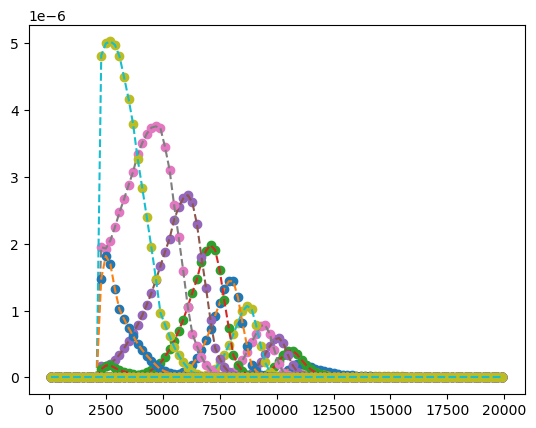

In [21]:
#generates final input files
LA_nir = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_nir.txt", "r")
LA_uv = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_uv.txt", "r")
LA_vis = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_vis.txt", "r")
rantypes = [LA_nir, LA_uv, LA_vis]
types = ['nir', 'uv', 'vis']

# list of functions of mmr_all over 100 (iz) heights, ranged over fixed 50 bin sizes 
ifi = 0
ielem = 2
iit = -1

eff_layers_km = [0.1, 0.136, 0.274, 0.414, 0.555, 0.697, 0.842, 0.989, 1.138, 1.29, 1.444, 1.6, 1.785, 2.028, 2.304, 2.589, 2.882, 3.184, 3.573, 4.06, 4.574, 5.117, 5.693, 6.305, 6.962, 7.668, 8.432, 9.401]
eff_layers = [i * 1000 for i in eff_layers_km]

template_spec = []
for nth in range(28):
    template_spec.append('0')

x_1 = z[0][:]
mmr_funcs_bin = []
for ibin in range(NBIN):
    y_1 = mmr_all[ifi,iit,ielem,:,ibin]
    f_1 = interp1d(x_1, y_1)
    plt.plot(x_1,y_1,'o',x_1,f_1(x_1),'--')
    mmr_funcs_bin.append(f_1)

for k, rantype in enumerate(rantypes):            
    type_name = types[k]
    rantype.seek(0)
    lines = rantype.readlines()
    for line_num, line in enumerate(lines):
            
        if "<ATMOSPHERE-LAYERS-MOLECULES>" in line:
            lines[line_num] = lines[line_num].replace("\n",",") 
            for j in range(28):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
        if "<ATMOSPHERE-LAYER-1>" in line:
            for height in range(72):
                if height < 28:
                    spec_lst = template_spec[:]
                    mmr_tot = 0
                    for ibin in range(NBIN):
                        round_mmr = mmr_funcs_bin[ibin](eff_layers[height]).item()
                        mmr_tot = mmr_tot + round_mmr
                    mmr_tot = "{:.6e}".format(mmr_tot)
                    spec_lst[height] = str(mmr_tot)
                    lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                    lines[line_num + height] = lines[line_num + height] + ",".join(spec_lst) + "\n"
                else:
                    spec_lst = template_spec[:]
                    lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                    lines[line_num + height] = lines[line_num + height] + ",".join(spec_lst) + "\n"
        
        if "<ATMOSPHERE-NAERO>" in line:
            lines[line_num] = lines[line_num].replace("0\n", "28\n")
            
        if "<ATMOSPHERE-AEROS>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ATYPE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "Cspec" + str(j + 1) + "_T5_USER" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AABUN>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "1" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-AUNIT>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "scl" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
                
        if "<ATMOSPHERE-ASIZE>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "0" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
        
        if "<ATMOSPHERE-ASUNI>" in line:
            lines[line_num] = lines[line_num].replace("\n","")
            for j in range(28):
                lines[line_num] = lines[line_num] + "um" + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
    for t in range(20):
        fadd = open(f"/Users/michellehu/Downloads/PSG_cloud_project_copy/cloud_spec/cloud_spec_{t+1}.txt","w")
        fadd.seek(0)
        lines_temp = fadd.readlines()
        lines.apend(f"<SPEC>Cspec{t+1}_T5_USER>\n")
        lines.append(lines_temp)
        lines.append("</SPEC>\n")
    
    augmented_input_file = open(f"/Users/michellehu/Downloads/PSG_cloud_project_copy/final_input/input_{type_name}.txt","w")
    augmented_input_file.writelines(lines)
    augmented_input_file.close()             


In [43]:
print(len("9.72e-01,2.98e+02,3.04e-02,3.80e-04,2.03e-08,3.20e-07,1.48e-07,1.70e-06,2.09e-01,3.00e-10,2.90e-10,2.30e-11,5.00e-10,5.36e-11,0.00e+00,0.00e+00,9.06e-10,1.70e-12,3.00e-12,0.00e+00,5.96e-10,1.90e-09,8.78e-12,7.81e-01,1.68e-10,6.89e-10,1.98e-10,2.52e-10,2.00e-09,0.00e+00,0.00013576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"))

318


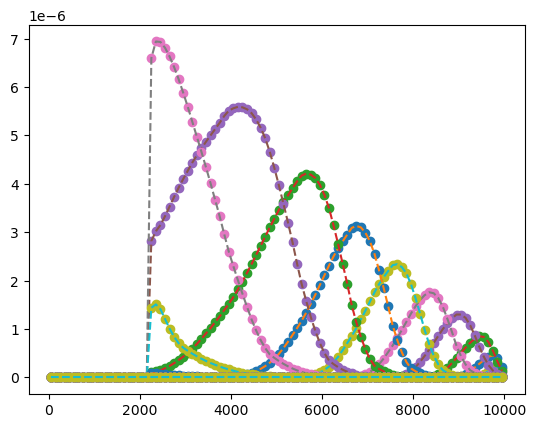

In [12]:
#generates everything excepts for the aerosole info

LA_nir = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_nir.txt", "r")
LA_uv = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_uv.txt", "r")
LA_vis = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/psg_LA_vis.txt", "r")
rantypes = [LA_nir, LA_uv, LA_vis]
types = ['nir', 'uv', 'vis']

# list of functions of mmr_all over 100 (iz) heights, ranged over fixed 50 bin sizes 
ifi = 0
ielem = 2
iit = -1

eff_layers_km = [0.05, 0.136, 0.274, 0.414, 0.555, 0.697, 0.842, 0.989, 1.138, 1.29, 1.444, 1.6, 1.785, 2.028, 2.304, 2.589, 2.882, 3.184, 3.573, 4.06, 4.574, 5.117, 5.693, 6.305, 6.962, 7.668, 8.432, 9.401]
eff_layers = [i * 1000 for i in eff_layers_km]

template_spec = []
for nth in range(28):
    template_spec.append('0')

x_1 = z[0][:]
mmr_funcs_bin = []
for ibin in range(NBIN):
    y_1 = mmr_all[ifi,iit,ielem,:,ibin]
    f_1 = interp1d(x_1, y_1)
    plt.plot(x_1,y_1,'o',x_1,f_1(x_1),'--')
    mmr_funcs_bin.append(f_1)

for k, rantype in enumerate(rantypes):            
    type_name = types[k]
    rantype.seek(0)
    lines = rantype.readlines()
    for line_num, line in enumerate(lines):
            
        if "<ATMOSPHERE-LAYERS-MOLECULES>" in line:
            lines[line_num] = lines[line_num].replace("\n",",") 
            for j in range(28):
                lines[line_num] = lines[line_num] + "Cloudspec" + str(j + 1) + ","
            lines[line_num] = (lines[line_num])[:-1]
            lines[line_num] = lines[line_num] + "\n"
            
        if "<ATMOSPHERE-LAYER-1>" in line:
            for height in range(72):
                if height < 28:
                    spec_lst = template_spec[:]
                    mmr_tot = 0
                    for ibin in range(NBIN):
                        round_mmr = mmr_funcs_bin[ibin](eff_layers[height]).item()
                        mmr_tot = mmr_tot + round_mmr
                    mmr_tot = "{:.6e}".format(mmr_tot)
                    spec_lst[height] = str(mmr_tot)
                    lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                    lines[line_num + height] = lines[line_num + height] + ",".join(spec_lst) + "\n"
                else:
                    spec_lst = template_spec[:]
                    lines[line_num + height] = lines[line_num + height].replace("\n", ",")
                    lines[line_num + height] = lines[line_num + height] + ",".join(spec_lst) + "\n"
        
        
    augmented_input_file = open(f"/Users/michellehu/Downloads/PSG_cloud_project_copy/final_input/input2_{type_name}.txt","w")
    augmented_input_file.writelines(lines)
    augmented_input_file.close()             


In [39]:
#tester for fixed height at iz = *some value*

qext_w = np.zeros(NWAVE,float)
qsca_w = np.zeros(NWAVE,float)
omega_w = np.zeros(NWAVE,float)
g_w = np.zeros(NWAVE,float)


iz = 99
ifi = 0
igroup = 2
ielem = 2
f = open("/Users/michellehu/Downloads/PSG_cloud_project_copy/namename.txt","w")

for iw in range(NWAVE):
    totalmass = 0
    for ibin in range(NBIN):
        print(conc_all[ifi,-1,2,iz,ibin])
        qsca_w[iw] = qsca_w[iw] + qsca[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,-1,2,iz,ibin]
        qext_w[iw] = qext_w[iw] + qext[igroup,iw,ibin] * np.pi * (r[ifile,igroup,ibin]/1e6)**2 * conc_all[ifi,-1,2,iz,ibin]
        g_w[iw] = g_w[iw] + asym[igroup,iw,ibin] * ssa[igroup,iw,ibin]
        totalmass = totalmass + rmass[ifile,igroup,ibin] / 1000. * conc_all[ifi,-1,2,iz,ibin]
    qext_w[iw] = qext_w[iw] / totalmass
    qsca_w[iw] = qsca_w[iw] / totalmass
    omega_w[iw] = qsca_w[iw] / qext_w[iw]
    g_w[iw] = g_w[iw] / (ssa[igroup,iw,:].sum())

    lines = "    ".join(["{:.4e}".format(wave[iw]),"{:.4e}".format(qext_w[iw]),"{:.4e}".format(omega_w[iw]),"{:.4e}".format(g_w[iw])]) + "\n"
#     lines = [wave[iw],qext_w[iw],omega_w[iw],g_w[iw]]
    f.writelines(lines)
#     f.writelines(["{:.2e}".format(wave[iw]),"{:.2e}".format(qext_w[iw]),"{:.2e}".format(omega_w[iw]),"{:.2e}".format(g_w[iw])])
#     f.writelines(['\n'])
f.close()

0.0
0.0
0.0
0.0
0.0
8.41546692091802e-34
9.99896622642459e-07
1.33758707540285e-06
1.7381946556896154e-06
2.2918029315706922e-06
3.10511285361376e-06
4.226517984836061e-06
5.896688333124792e-06
8.328490953518686e-06
1.2014268716154356e-05
1.7603810249820692e-05
4.28210148081857e-05
6.437657874933376e-05
9.714394742518074e-05
0.00014732000507403336
0.0002235980406942508
0.0003381593106572747
0.0005064125174419897
0.0007420938606651598
0.0010634348815749487
0.0015137726742915575
0.0020327416708034855
0.002473750639041143
0.002538077319501044
0.0021711207986281358
0.0012849093125116616
0.000412873367842289
4.160320761107486e-05
1.5000285508562095e-06
2.4533055190628768e-08
1.964146604646842e-10
8.30186990591225e-13
2.038005213197427e-15
2.93571021449117e-18
2.6931379542075137e-21
1.614203437872386e-24
6.727669241542264e-28
2.1018991470498953e-31
4.815404701481151e-35
8.191264350340887e-39
1.0327039212068065e-42
1.2625459311095557e-46
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.41546692091802e-34
9.